## P2 : Investigate a [Titanic] Dataset

#### Author :- Sai Charan Adurthi


## 1. Questions

* Which gender has a better chance of survival ?
* Which Passenger class has a better chance of survival ?
* which age group has a better chance of survival ?
* Relationship between age and fare charged.

## 2. Import necessary libraries and setup the report.
        I am using numpy, pandas, matlotlib and seaborn libraries.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import scipy.stats as stats

#this allows visualisations and plots to be diplayed in the notebook/report.
%pylab inline  

Populating the interactive namespace from numpy and matplotlib


In [2]:
# function to plot data.
def plot_pie_data(series_data, labels, title_cat):
    '''plots pie chart for the given data and labels.
    data    :-    pandas series data
    labels  :-    labels for the pie chart in order.'''
    
    # plot customisation
    colors = ['green', 'blue']
    explode = (0.2, 0)  # explode 1st slice
 
    # Plotting the data
    plt.pie(series_data, labels=labels, explode=explode, colors=colors,
        autopct='%1.1f%%', shadow=True, startangle=80)
    plt.legend(labels, loc="lower left")
    plt.axis('equal')
    plt.title("Pie Chart over Survivals and Deaths of "+title_cat+" passengers.", loc="right")
    plt.show()

# function to calculate the percentage of passengers suvived, dead.    
def calculate_percentage(val, total):
    """Calculates the percentage of a value over a total
    val     :-    the value of passengers survived or dead of a specific category/class.
    total   :-    the total value of passengers of a specific category/class.
    """
    percent = np.divide(val, total, dtype=float)
    return percent

#function to plot charts. 
def plot_count_and_percentage_charts(survivals_data, deaths_data, survivals_percentages, deaths_percentages, labels, leg_loc):
    '''plots charts for survival and deaths data for the given input.
    survivals_data          :-    data of survived passengers
    deaths_data             :-    data of dead passengers
    survivals_percentages   :-    percentage of passengers survived according to a specific category.
    deaths_percentages      :-    percentage of passengers dead according to a specific category.
    labels                  :-    labels for x-axis of charts
    leg_loc                 :-    location of the legend on the chart.'''
    
    f, (ax1, ax2) = plt.subplots(1, 2, figsize=(10,5))
    
    tick_spacing = np.array(range(len(labels)))+0.4
    
    # plot chart for number of survivors per category / class
    ax1.bar(range(len(survivals_data)), survivals_data, label='Survivors', color='g')
    ax1.bar(range(len(deaths_data)), deaths_data, bottom=survivals_data, label='Deaths', color='b')
    plt.sca(ax1)
    plt.xticks(tick_spacing, labels)
    ax1.set_ylabel("Count")
    ax1.set_xlabel("Category/Class Type")
    ax1.set_title("Count of survivors by class",fontsize=12)
    plt.legend(loc=leg_loc)

    # plot chart for percentage of survivors per category / class
    ax2.bar(range(len(survivals_percentages)), survivals_percentages, color='g')
    ax2.bar(range(len(deaths_percentages)), deaths_percentages, bottom=survivals_percentages, color='b')
    plt.sca(ax2)
    plt.xticks(tick_spacing, labels)
    ax2.set_ylabel("Percentage")
    ax2.set_xlabel("Category/Class Type")
    ax2.set_title("Percentage of survivors by class",fontsize=12)

## 3. Data Wrangling / acquisition
     Load CSV into dataframe

In [3]:
titanic_df = pd.read_csv('titanic-data.csv')

## 4. Data Wrangling / cleaning

    There isn't much data acquisition to perform for this dataset, apart from loading the data into dataframe from csv file. Now, we look for the  missing values in the data and remove data which is not required for our analysis to make the 
    operations faster.

    First, we take a look at the dataframe's first 10 rows. 

In [4]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S
5,6,0,3,"Moran, Mr. James",male,NaN,0,0,330877,8.4583,NaN,Q
6,7,0,1,"McCarthy, Mr. Timothy J",male,54.0,0,0,17463,51.8625,E46,S
7,8,0,3,"Palsson, Master. Gosta Leonard",male,2.0,3,1,349909,21.0750,NaN,S
8,9,1,3,"Johnson, Mrs. Oscar W (Elisabeth Vilhelmina Berg)",female,27.0,0,2,347742,11.1333,NaN,S
9,10,1,2,"Nasser, Mrs. Nicholas (Adele Achem)",female,14.0,1,0,237736,30.0708,NaN,C



Now, we look at a concise information of titanic dataframe to find the missing values/incomplete data.

In [5]:
titanic_df.info()  #concise summary of the dataframe

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    891 non-null int64
Survived       891 non-null int64
Pclass         891 non-null int64
Name           891 non-null object
Sex            891 non-null object
Age            714 non-null float64
SibSp          891 non-null int64
Parch          891 non-null int64
Ticket         891 non-null object
Fare           891 non-null float64
Cabin          204 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 83.6+ KB


**From above information it is clear that the columns [Age, Cabin, Embarked] have missing values.**

We remove / replace missing values of age and embarked columns as they are need to answer our questions.

## 4.1. Missing Ages

    I am assuming the average age for a gender in a class as the replacement for missing values.

In [6]:
# using fillna() and transform with groupby to replace all NaN values in titanic_df - Age column with their respective mean age.

titanic_df['Age'].fillna(titanic_df.groupby(['Sex', 'Pclass'])['Age'].transform("mean"), inplace=True)

## 4.2. Missing Embarkment

In [7]:
missing_embarkments = titanic_df[titanic_df['Embarked'].isnull()]

missing_embarkments

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
61,62,1,1,"Icard, Miss. Amelie",female,38.0,0,0,113572,80.0,B28,NaN
829,830,1,1,"Stone, Mrs. George Nelson (Martha Evelyn)",female,62.0,0,0,113572,80.0,B28,NaN


Both the null valued embarked column have ticket fare and cabin in common, so we try to search for another passenger with the same ticket number or cabin irrespective of their passenger class.

In [8]:
titanic_df[(titanic_df['Embarked'].notnull()) & ((titanic_df['Ticket'] == '113572') | (titanic_df['Cabin'] == 'B28'))]

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked


There are no rows matching with ticket number and cabin of the embarked - NaN valued rows.

As, we don't have enough data to make an assumption for the embarked stage / place.  We, remove these rows from the dataframe.

In [9]:
titanic_df = titanic_df[titanic_df['Embarked'].notnull()]

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 12 columns):
PassengerId    889 non-null int64
Survived       889 non-null int64
Pclass         889 non-null int64
Name           889 non-null object
Sex            889 non-null object
Age            889 non-null float64
SibSp          889 non-null int64
Parch          889 non-null int64
Ticket         889 non-null object
Fare           889 non-null float64
Cabin          202 non-null object
Embarked       889 non-null object
dtypes: float64(2), int64(5), object(5)
memory usage: 90.3+ KB


Now, we're done with removing / replacing null values in our data to answer the questions needed.

We don't need the columns Name, Cabin, Sibsp, Parch and Ticket to answer our proposed queestions.

Hence, we remove those columns from the dataframe.

In [10]:
del titanic_df['Name']

del titanic_df['Cabin']

del titanic_df['Ticket']

del titanic_df['SibSp']

del titanic_df['Parch']

Now, we take a look at the dataframe after deleting the columns Name, Cabin, Ticket

In [11]:
titanic_df.head(10)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,0,3,male,22.000000,7.2500,S
1,2,1,1,female,38.000000,71.2833,C
2,3,1,3,female,26.000000,7.9250,S
3,4,1,1,female,35.000000,53.1000,S
4,5,0,3,male,35.000000,8.0500,S
5,6,0,3,male,26.507589,8.4583,Q
6,7,0,1,male,54.000000,51.8625,S
7,8,0,3,male,2.000000,21.0750,S
8,9,1,3,female,27.000000,11.1333,S
9,10,1,2,female,14.000000,30.0708,C


## 4.3. Fixing Data and Datatypes.
    Fix the data by replacing it with the appropriate data types for those values / fields to make the data more intuitive.
        
        * Here, the Pclass column will have values of strings as First class, Second class and Third class.
        * Survived column will have boolean values True and False instead of 1 and 0
        * Embarked ports will have their full names with the latest names i.e. [S - Southampton, C - Chebourg, Q - Queenstown
          now known as Cobh.
        * The fare value is rounded of to two decimal places. 
        * The ages of passengers are grouped to make the analysis of age data easier.

In [12]:
def fix_data(df):
    '''
    Updates the values in the dataframe with appropriate data and data types which are much more intuitive to understand.
    
    df  :-  dataframe.
    '''
    
    # fixing data for survived column
    survived_boolean = {0: False, 1: True}
    df['Survived'] = df['Survived'].map(survived_boolean)

    # Passenger Class abbreviation
    passenger_class = {1: 'First Class', 2: 'Second Class', 3: 'Third Class'}
    df['Pclass'] = df['Pclass'].map(passenger_class)
    
    # Embarkation port abbreviation
    embarked_ports = {'S': 'Southampton', 'C': 'Cherbourg','Q':'Cobh'}
    df['Embarked'] = df['Embarked'].map(embarked_ports)
    
    # rouding off the fare to two decimal places.
    df['Fare'] = np.round(df['Fare'], decimals=2)
    
    return df

titanic_df = fix_data(titanic_df)
titanic_df.head(5)

,PassengerId,Survived,Pclass,Sex,Age,Fare,Embarked
0,1,False,Third Class,male,22.0,7.25,Southampton
1,2,True,First Class,female,38.0,71.28,Cherbourg
2,3,True,Third Class,female,26.0,7.92,Southampton
3,4,True,First Class,female,35.0,53.10,Southampton
4,5,False,Third Class,male,35.0,8.05,Southampton


To make the column name more intuitive we rename the column 'Pclass' as 'Passenger Class'

In [13]:
# renaming the Pclass column to PassengerClass.
titanic_df = titanic_df.rename(columns = {'Pclass':'PassengerClass'})

titanic_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 889 entries, 0 to 890
Data columns (total 7 columns):
PassengerId       889 non-null int64
Survived          889 non-null bool
PassengerClass    889 non-null object
Sex               889 non-null object
Age               889 non-null float64
Fare              889 non-null float64
Embarked          889 non-null object
dtypes: bool(1), float64(2), int64(1), object(3)
memory usage: 49.5+ KB


The age data is not grouped here, to make the ages easier to analyse we group/bin the ages.

Using this, we can compare groups of ages instead of individual ages. Which is a finite range comapared to the range of ages.

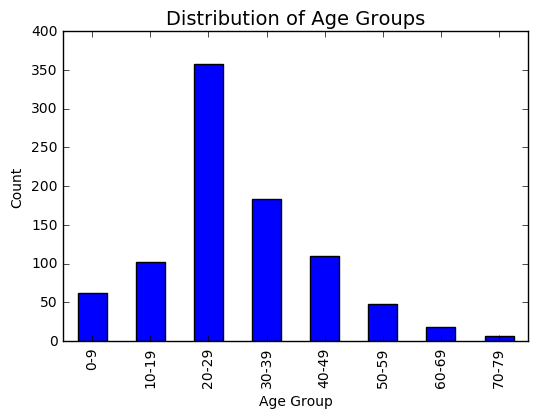

In [14]:
# storing the age data of passengers to use the data for relation between fare.
age_data_of_passengers = titanic_df['Age']

age_labels = ['0-9', '10-19', '20-29', '30-39', '40-49', '50-59', '60-69', '70-79']
titanic_df['AgeGroup'] = pd.cut(titanic_df.Age, range(0, 81, 10), right=False, labels=age_labels)

# distributing the passengers over age groups
titanic_df.groupby(['AgeGroup']).size().plot(kind='bar',stacked=True)
plt.title("Distribution of Age Groups",fontsize=14)
plt.ylabel('Count')
plt.xlabel('Age Group')

Now, we will start exploring the data we obtained after wrangling to find the relations between variables.

## 5.  Exploring Data
        We start exploring the data by finding the relations between the variables we need to anwser our proposed questions.

In [15]:
# get data based on passenger survival and death
survivors_data = titanic_df[titanic_df.Survived==True]
deaths_data = titanic_df[titanic_df.Survived==False]

# Variables related to survival, death. categorized into gender, age.
num_males = len(titanic_df[titanic_df['Sex'] == 'male'])
num_females = len(titanic_df[titanic_df['Sex'] == 'female'])

male_survivors = survivors_data[survivors_data['Sex'] == 'male']
num_male_survivals = len(male_survivors)

female_survivors = survivors_data[survivors_data['Sex'] == 'female']
num_female_survivals = len(female_survivors)

male_deaths = deaths_data[deaths_data['Sex'] == 'male']
num_male_deaths = len(male_deaths)

female_deaths = deaths_data[deaths_data['Sex'] == 'female']
num_female_deaths = len(female_deaths)

survivors_age_group = survivors_data['AgeGroup']
deaths_age_group = deaths_data['AgeGroup']

## 5.1. Which gender has a better chance of survival ?
    We look at how many males and females were on board and which gender had the highest survival rate, calculate the necessary statistics to answer this question.
   

#### Counts of surviviors by gender

In [16]:
gender_table = pd.crosstab(titanic_df['Survived'], titanic_df['Sex'])

gender_table

Sex,female,male
Survived,,
False,81,468
True,231,109


The figures above say that there were a significant amount of more males than females on titanic.

#### Mean of survivors by gender

In [17]:
titanic_df.groupby('Sex').Survived.mean()

Sex
female    0.740385
male      0.188908
Name: Survived, dtype: float64

Clearly, the mean of male suriviors is significantly less than female survivors. And historically, "women and children first" is a phrase that was first coined on the British HMS Birkenhead, which sunk in 1852. Titanic, which also departed from Britain, is likely to have encountered the same informal policy, handed down culturally through the British seas.

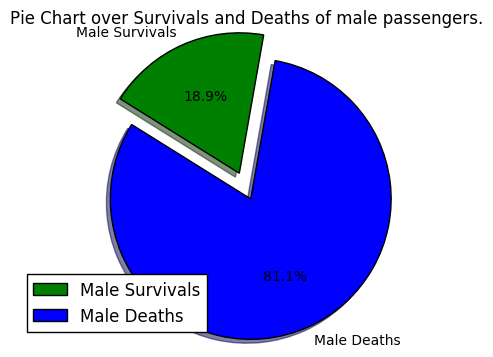

Male survivals: 109
Male deaths: 468
Number of males: 577
Proportion of male survivals: 0.188908145581


In [18]:
# calculate male, deaths  and survivals
plot_pie_data(pd.Series([num_male_survivals, num_male_deaths], index=['Male Survivals', 'Male Deaths']),\
              ['Male Survivals', 'Male Deaths'], "male")
print 'Male survivals: ' + str(num_male_survivals)
print 'Male deaths: ' + str(num_male_deaths)
print 'Number of males: ' + str(num_males)
print 'Proportion of male survivals: ' + str(float(num_male_survivals)/(num_male_survivals + num_male_deaths))

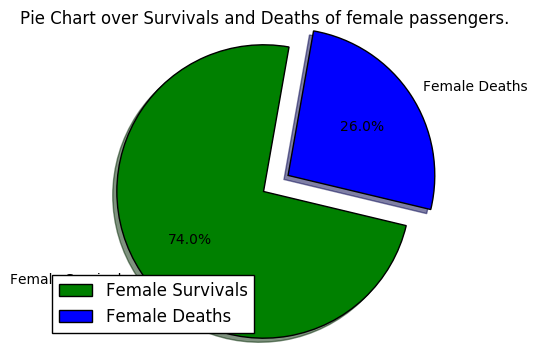

Female survivals: 231
Female deaths: 81
Number of females: 312
Proportion of female survivals: 0.740384615385


In [19]:
# calculate female deaths, survivors

plot_pie_data(pd.Series([num_female_survivals, num_female_deaths], \
                           index=['Female Survivals', 'Female Deaths']), ['Female Survivals', 'Female Deaths'], "female")
print 'Female survivals: ' + str(num_female_survivals)
print 'Female deaths: ' + str(num_female_deaths)
print 'Number of females: ' + str(num_females)
print 'Proportion of female survivals: ' + str(float(num_female_survivals)/(num_female_survivals + num_female_deaths))

### Two population proportion Z-Score.

The z score test for two population proportions is used when we want to know whether two populations or groups (e.g., males and females; theists and atheists) differ significantly on some single (categorical / characteristic - for example, whether they are vegetarians, musicians, etc..).

Here, the groups are males, females.  And the characteristic is survival.

The formula for z-score is :-
    
                z = (p1 - p2) / sqrt(p * (1 - p) * ( (1/n1) + (1/n2) ) ).
                
                Where, p1 --> proportion of sample 1
                       p2 --> proportion of sample 2
                       p  --> pooled proportion of samples 1 and 2.
                       
                       n1 --> size of sample 1
                       n2 --> size of sample 2.
                
                And, 
                p = (p1 * n1 + p2 * n2) / (n1 + n2).
                
To test if there is a statistical difference between the two genders, we conduct a difference in proportions test using a significant level of **0.05**.  Let P1 be the proportion of male survivals, let P2 be the proportion of female survivals.


### Hypothesis

    The hypothesis for this question is that gender impacts the chances of survival.
    
    HO :- Gender doesnot impact the chances of survival. i.e. P1 = P2
    
    HA :- Gender impacts the chances of survival. i.e. P1 != P2
    

In [20]:
# p1 is the proportion of male survivors, multiplying them with 1.0 to convert to float
p1 = (num_male_survivals) * 1.0/(num_male_survivals + num_male_deaths)
n1 = float(num_males)

# p2 is the proportion of male survivors, multiplying them with 1.0 to convert to float
p2 = (num_female_survivals) * 1.0/(num_female_survivals + num_female_deaths)
n2 = float(num_females)

# calculating pooled proportion using above formula.
p = (p1 * n1 +  p2 * n2) / (n1 + n2)

# calculating z-score using above formula.
z = (p1 - p2) / sqrt(p * (1-p) * ((1.0/n1) + (1.0/n2)))

print("z-score is = "+str(z))

z-score is = -16.1479516425


The z-score critical value for a significance level of 0.05 and Confidence Interval of 95% is -1.96.

And, z < -1.96.

Thus, we reject the null hypothesis (**HO** --> gender doesnot impact the chances of survival) that the proportions are equal. Also, there is statistical evidence pointing to the fact that a female you had a higher chance of surviving.

## 5.2. Which Passenger Class has a better chance of survival ?
    We look at how many first class, second class and third class passengers were on board. Whether any specific class had the highest survival rate, etc.. by looking at the statistics related to the survival data grouped by passenger class.

#### Count of survivors by passenger class

In [21]:
pclass_table = pd.crosstab(titanic_df['Survived'],titanic_df['PassengerClass'])
pclass_table

PassengerClass,First Class,Second Class,Third Class
Survived,,,
False,80,97,372
True,134,87,119


#### Proportion of survivors by Passenger Class.

In [22]:
print titanic_df.groupby('PassengerClass').Survived.mean()

PassengerClass
First Class     0.626168
Second Class    0.472826
Third Class     0.242363
Name: Survived, dtype: float64


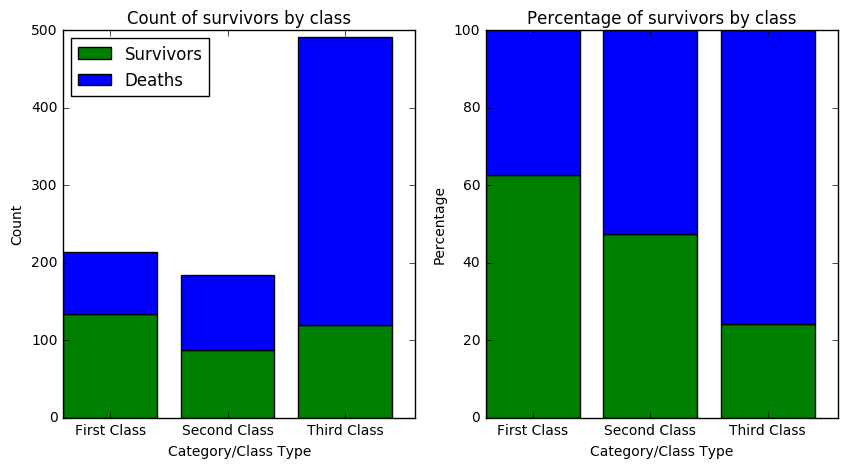

In [23]:
# calculate values for each survival status
survivors_class = survivors_data.groupby(['PassengerClass']).size().values
deaths_class = deaths_data.groupby(['PassengerClass']).size().values

# calculate the total for percentates
total = survivors_class + deaths_class

# use calculate_percentage_function to calculate percentage of the total
survivals_percentages = calculate_percentage(survivors_class, total)*100 
deaths_percentages = calculate_percentage(deaths_class, total)*100 

# list of labels of passenger class categories.
categories_labels = ['First Class', 'Second Class', 'Third Class']

# plot count and perecentage charts for data based on passenger class.
legend_location = "upper left"
plot_count_and_percentage_charts(survivors_class, deaths_class, survivals_percentages, \
                                 deaths_percentages, categories_labels, legend_location)

The results indicate that majority of the passengers on the ship were third class and also majority of passengers died were also thrid class. 
* From the first class, 63% of the passengers survived.
* From the second class, 47% of the passengers survived. 
* From the third class, a mere 24% pf the passengers survived.


### Hypothesis

    The hypothesis for this question is that passenger class impacts the chances of survival.
    
    HO :- Passenger class doesnot impact the chances of survival.
    
    HA :- Passenger class impacts the chances of survival.
    

**NOTE :- by saying passenger class, here we intuitively mean that it refers to the social class of a passenger.**

We have two groups of categorical data and multiple columns to observe.  We use chi square tests to test the hypothesis for this data.

### Chi Square test for indepedence.

The Chi-Square test of Independence is used to determine if there is a significant relationship between two nominal (categorical) variables.  The frequency of one nominal variable is compared with different values of the second nominal variable.  The data can be displayed in an **R*C** contingency table, where **R** is the **row** and **C** is the **column**.

Here, in our data Categories are :- survivals and deaths.  Columns are first, second and third passenger classes.


In [24]:
# constructing the contingency table for surviros and non-survivors for each passenger class.
chi2, p_value, dof, expected = stats.chi2_contingency(pclass_table.values)

print("p value = "+str(p_value))

p value = 1.18136247855e-22


Looking at the p-value obtained from chi square test above, we see that the p-value is 1.18 * 10<sup>22</sup>, which is signficantly small when compared to p-value of 0.05. 

Hence, we reject the null hypothesis (**HO** --> survival and passenger class are not related **i.e.** passenger class doesnot impact the chances of survival). 

In fact, the passenger class [intuitively/implicitly the social class of a passenger] played quite significant role in the survival of a passenger.

## 5.3. Which age group had a better chance of survival ?
    
    To analyze the dependency/relation between chances of survival and age group.  We look at the statistics related to survival and death based on age of the passengers in the sample.

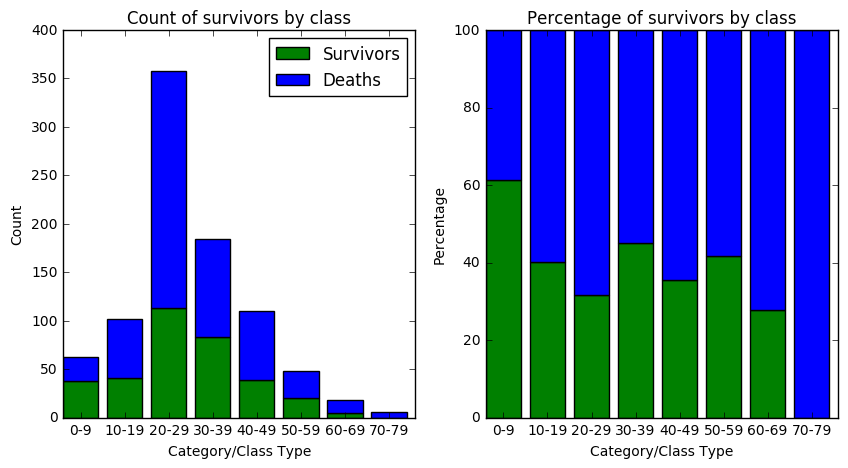

In [25]:
# calculate values for each survival status
survivals_age_group = survivors_data.groupby(['AgeGroup']).size().values
deaths_age_group = deaths_data.groupby(['AgeGroup']).size().values

# calculate total value for percentages
total = survivals_age_group + deaths_age_group

# use calculate_percentage_function to calculate percentage of the total
survivals_percentages = calculate_percentage(survivals_age_group, total)*100 
deaths_percentages = calculate_percentage(deaths_age_group, total)*100 

# plot count and perecentage charts for data based on age group.
legend_location = "upper right"
plot_count_and_percentage_charts(survivals_age_group, deaths_age_group, survivals_percentages,\
                                 deaths_percentages, age_labels, legend_location)

From the above visualisations it's clear that there were a lot more younger survivors. It's difficult to tell if there is a significant difference in the mean age, based on the visualisations alone. 

When we compare survivals and deaths, we are essentially **comparing two categorical variables from a single population**. Therefore, we will use the **chi-square** test for independence to determine whether age and survival/death are dependent/related. In our statistical tests, we will use an alpha coefficient of **0.95**.

### Hypothesis
    The hypothesis for this question is that age group impacts the chances of survival.

    HO :- Age group doesnot impact the chances of survival.

    HA :- Age group impacts the chances of survival.
    
We, calculate the the p-value using chi-square caluculation in scipy.

In [26]:
# constructing the contingency table for surviros and non-survivors for each age group.
age_group_table = pd.crosstab([titanic_df['Survived']], titanic_df['AgeGroup'])
chi2, p_value, dof, expected = stats.chi2_contingency(age_group_table.values)

print("p value is = "+str(p_value))

p value is = 0.000107250095367


Looking at the p-value obtained from chi square test above, we see that the p-value is aproximately 0.0001. which is less than 0.05.

Hence, we reject the null hypothesis (**HO** --> survival and age group are not related/dependnet **i.e.** age group doesnot impact the chances of survival).

According to the data it seems like age group has an effect on survival of the passenger and its also intuitive according to human nature.

## Relation between age and fare charged.
    we check for a corelation between age and fare charged, to estimate the age of passenger based on fare. Also, in most of the places around the world there are reductions of fare charged based on age i.e. in the case of children, old citizens etc..

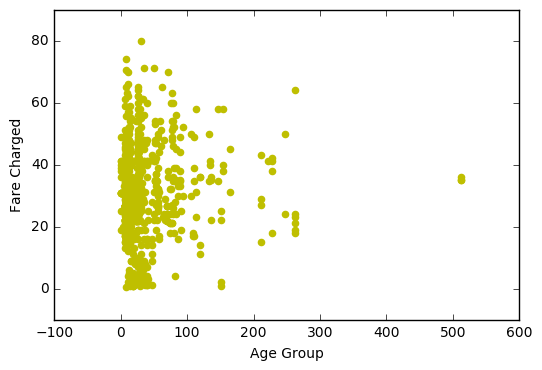

In [27]:
figure, ax = subplots()

plt.scatter(titanic_df['Fare'], age_data_of_passengers, color='y')
ax.set_xlabel('Age Group')
ax.set_ylabel('Fare Charged')
show()

In [28]:
pearson_r, p_val = stats.pearsonr(titanic_df['Fare'], age_data_of_passengers)

print("Pearson Corelation coefficient is = "+str(pearson_r))

Pearson Corelation coefficient is = 0.11547387895


The pearson corelation coefficient obtained is 0.1 approximately which indicates a very weak corelation between age and fare charged.  Which means that the fare amount is not particularly sufficient to estimate the age.  Especially, the missing ages.

## 6. Conclusion

### Limitations

    There are several limitations to this analysis based on the given sample data.
    
    * The sample data had only 12 columns of data to work with with out of which three of were pretty much irrelevant and ambiguious i.e. [Name, Cabin, Ticket] 
    
    * Out of 891 rows of data in the sample, 179 rows has age value missing which is crucial in analysing the age factor for suvival.
    
    * Cabin's location relative to the ship levels would be a great dimension to look at, but the data on cabin is very vaguely provied with mostly missing values.
    
    * The units of fare charged was not specified i.e. currency used for payment.
    
### Factors for survival

    Gender, Age and Passenger Class [i.e. Social Class] played an important role in the survival of a passenger according to the data.
    
### Finally

    Overall, the strongest point to remember is that Social Class/Passenger class of the passenger had a strong impact on the chances of survival.  Then, the policy of "Women and Children" first seems to have taken place here with most of the female passengers surviving.
    Although age had an impact on the survival of passengers I wouldn't say that its a significant one as for one most of the age data was missing and secondly, in the given sample the most of the passengers are from younger age groups .